We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [124]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-06-17 10:57:02--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.209.121, 13.227.209.26, 13.227.209.16, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.209.121|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [125]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [126]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-06-16   16      6  2020    761       7             Afghanistan    AF   
1 2020-06-15   15      6  2020    664      20             Afghanistan    AF   
2 2020-06-14   14      6  2020    556       5             Afghanistan    AF   
3 2020-06-13   13      6  2020    656      20             Afghanistan    AF   
4 2020-06-12   12      6  2020    747      21             Afghanistan    AF   
5 2020-06-11   11      6  2020    684      21             Afghanistan    AF   
6 2020-06-10   10      6  2020    542      15             Afghanistan    AF   
7 2020-06-09    9      6  2020    575      12             Afghanistan    AF   
8 2020-06-08    8      6  2020    791      30             Afghanistan    AF   
9 2020-06-07    7      6  2020    582      18             Afghanistan    AF   

  countryterritoryCode  popData2018 continentExp  
0                  AFG   37172386.0         Asia  
1                  AFG   37172386.0         Asia  
2                  AFG   37172386.0         Asia  
3                  AFG   37172386.0         Asia  
4                  AFG   37172386.0         Asia  
5                  AFG   37172386.0         Asia  
6                  AFG   37172386.0         Asia  
7                  AFG   37172386.0         Asia  
8                  AFG   37172386.0         Asia  
9                  AFG   37172386.0         Asia

Last check of our source dataframe.

In [127]:
df.count()

dateRep                    23846
day                        23846
month                      23846
year                       23846
cases                      23846
deaths                     23846
countriesAndTerritories    23846
geoId                      23846
countryterritoryCode       23562
popData2018                23475
continentExp               23846
dtype: int64

We pivot to a country by column format.

In [128]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                           \
geoId         AD     AE     AF   AG   AI    AL     AM    AO      AR    AT   
dateRep                                                                     
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN   0.0   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN   0.0   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN   0.0   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN   0.0   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN   0.0   
...          ...    ...    ...  ...  ...   ...    ...   ...     ...   ...   
2020-06-12   0.0  479.0  747.0  0.0  0.0  44.0  566.0   5.0  1373.0  28.0   
2020-06-13   1.0  513.0  656.0  0.0  0.0  31.0  612.0  12.0  1391.0  30.0   
2020-06-14   0.0  401.0  556.0  0.0  0.0  48.0  723.0   8.0  1531.0  20.0   
2020-06-15   0.0  394.0  664.0  0.0  0.0  57.0  663.0   2.0  1282.0  24.0   
2020-06-16   0.0  342.0  761.0  0.0  0.0  69.0  397.0   2.0  1208.0  27.0   

            ... deaths                                                 
geoId       ...     VC   VE   VG   VI   VN   XK    YE    ZA   ZM   ZW  
dateRep     ...                                                        
2019-12-31  ...    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-01  ...    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-02  ...    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-03  ...    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-04  ...    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
...         ...    ...  ...  ...  ...  ...  ...   ...   ...  ...  ...  
2020-06-12  ...    0.0  0.0  0.0  0.0  0.0  0.0   7.0  79.0  0.0  0.0  
2020-06-13  ...    0.0  0.0  0.0  0.0  0.0  0.0   3.0  65.0  0.0  0.0  
2020-06-14  ...    0.0  1.0  0.0  0.0  0.0  1.0  21.0  69.0  0.0  0.0  
2020-06-15  ...    0.0  1.0  0.0  0.0  0.0  0.0   4.0  57.0  1.0  0.0  
2020-06-16  ...    0.0  1.0  0.0  0.0  0.0  1.0  44.0  88.0  0.0  0.0  

[169 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [129]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-06-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-13   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-14   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-15   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-16   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-06-12 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-13 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-14 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-15 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-16 NaN  NaN NaN NaN NaN NaN NaN  

[534 rows x 420 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [130]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    534.000000
mean     266.500000
std      154.296792
min        0.000000
25%      133.250000
50%      266.500000
75%      399.750000
max      533.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [132]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [136]:
country  = 'NL'
measure  = 'cases'
smeasure = 'scases'
pmeasure = 'pcases'

df_wave = pd.DataFrame(columns=[pmeasure, 'beta', 'mu', 'start', 'peak', 'floor', 'final', 'maxcur'])

wave = 0
df_geo[(pmeasure, country)] = 0

df_geo[(smeasure, country)] = df_geo[measure][country].loc[:].rolling(7).mean()

In [137]:
popdata = df[df['geoId'] == country]['popData2018'].iloc[0]
mincases = popdata / 1e6
print('Minimum number of cases is {:1.0f}'.format(mincases))

Minimum number of cases is 17


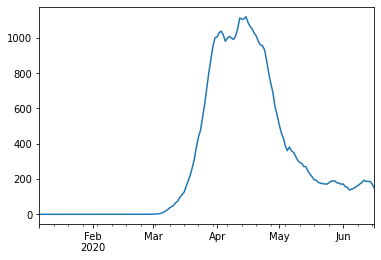

In [138]:
df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                        measure:df_geo[smeasure][country] - df_geo[pmeasure][country].sum()})
df_pred[df_pred[measure].notnull()][measure].plot()

To ignore early outbreaks and long tails, we define the minimum case count as one in million.

The `cumul`column gets the cumulative cases. Using these, we divide the current by the cumulative cases. According to Gumbel this should have a logarithmic form, so using a logarithmic scale it should approach linearity.

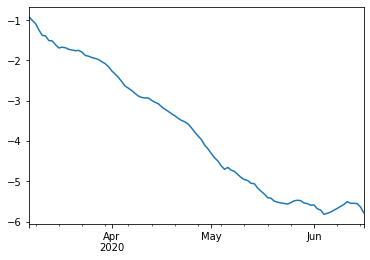

In [105]:
df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
np.log(df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]['gumdiv']).plot()

To prevent errors we only use values above 0 and take the logarithm. Then we cut off the range to remove noise at the beginning and end of the curve and filter out days with number of cases below the minimum.

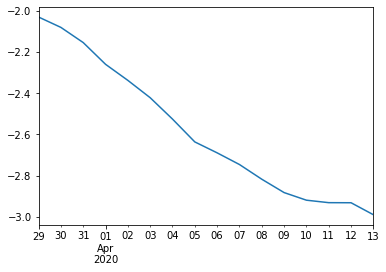

In [106]:
df_pred = df_pred[df_pred['gumdiv'] > 0].loc[:]
df_pred['linear'] = np.log(df_pred['gumdiv'])

df_pred = df_pred[(df_pred['linear'] < -2) &
                  (df_pred['linear'] > -3) &
                  (df_pred[measure] > mincases)]
df_pred['linear'].plot()

We can now try to fit a line to the resulting data. To check the fit, we create a column with the resulting slope and intercept.

Slope -0.068260 intercept 4.002 R2 0.965717 p 0.000000 stderr 0.003437


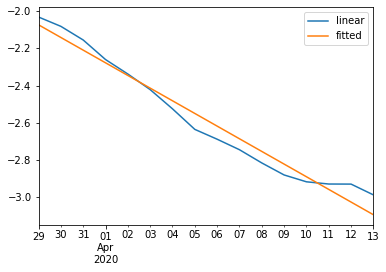

In [107]:
from scipy.stats import linregress

slope, intercept, rvalue, pvalue, stderr = linregress(df_pred[['daynum', 'linear']])
df_pred['fitted'] = df_pred['daynum'] * slope + intercept

print('Slope {:1.6f} intercept {:1.3f} R2 {:1.6f} p {:1.6f} stderr {:1.6f}'.format(
    slope, intercept, rvalue ** 2, pvalue, stderr))
df_pred[['linear', 'fitted']].plot()

From slope and intercept of this line we can calculate beta and mu of the corresponding Gumbel distribution. Because the resulting CDF always ends at 1, we need to scale back to the original data dividing the number of cases in the dataset by the sum of the Gumbel PDF for the same days.

In [108]:
beta = - 1 / slope
mu = beta * (intercept + np.log(beta))

df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

final = df_pred['scale'].mean()

print('Gumbel beta {:1.3f} with mu {:1.0f} for {:1.0f}'.format(beta, mu, final))

Gumbel beta 14.650 with mu 98 for 42781


Finished fitting, now back to the original data! We apply the Gumbel PDF to the original day numbers and scale by the current cases as part of the total.

In [122]:
df_wave[pmeasure].loc[wave] = gumpdf(df_geo['daynum'], beta, mu) * final
df_wave[pmeasure][0]

2019-12-31     0.000000e+00
2020-01-01     0.000000e+00
2020-01-02    3.696356e-298
2020-01-03    3.800042e-278
2020-01-04    1.859541e-259
                  ...      
2021-06-12     4.866830e-10
2021-06-13     4.545705e-10
2021-06-14     4.245768e-10
2021-06-15     3.965622e-10
2021-06-16     3.703961e-10
Freq: D, Name: daynum, Length: 534, dtype: float64

In [121]:
df_geo[(pmeasure, country)] = gumpdf(df_geo['daynum'], beta, mu) * final
df_geo[(pmeasure, country)]

2019-12-31     0.000000e+00
2020-01-01     0.000000e+00
2020-01-02    3.696356e-298
2020-01-03    3.800042e-278
2020-01-04    1.859541e-259
                  ...      
2021-06-12     4.866830e-10
2021-06-13     4.545705e-10
2021-06-14     4.245768e-10
2021-06-15     3.965622e-10
2021-06-16     3.703961e-10
Freq: D, Name: (pcases, NL), Length: 534, dtype: float64

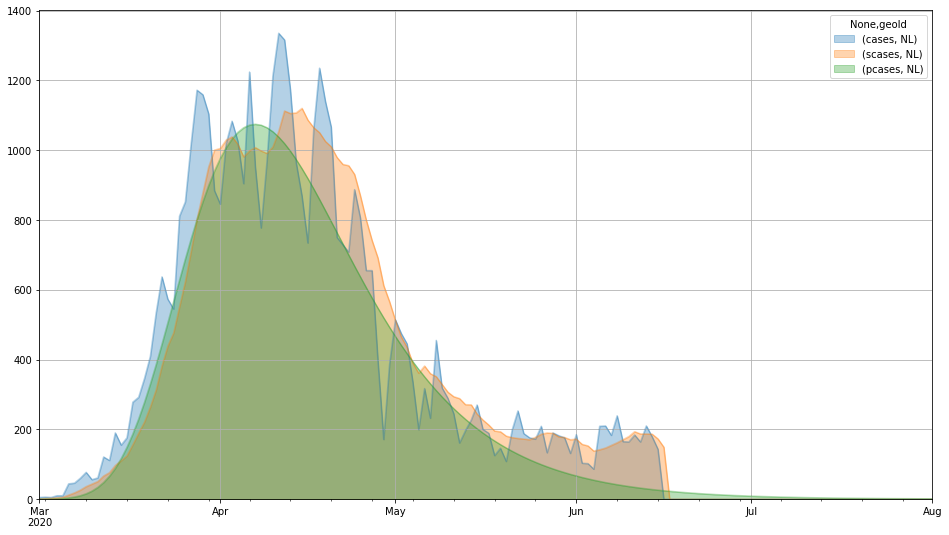

In [123]:
df_geo[[(measure, country),
        (smeasure, country),
        (pmeasure, country)]].loc['20200301':'20200801'].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

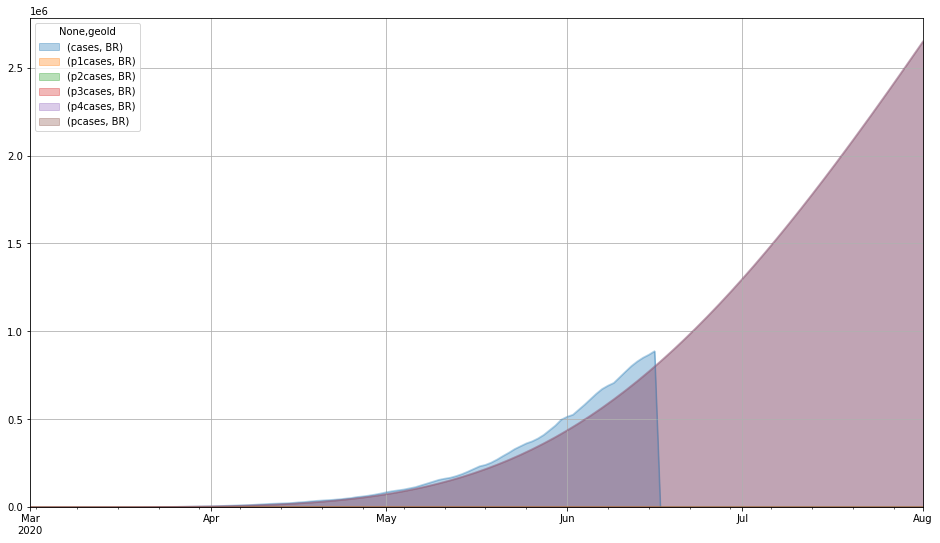

In [198]:
df_geo[[(measure, country), (p1measure, country), (p2measure, country), (p3measure, country), (p4measure, country), (pmeasure, country)]].loc['20200301':'20200801'].cumsum().plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [134]:
progress = df_geo[measure][country].sum() / final
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, final))

Currently at 100.85% of 30786


The peak can be found at the first predicted value that is larger than the next.

In [135]:
peak = df_geo[(df_geo[(p4measure, country)] > df_geo[(p4measure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at NaT


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [136]:
print('Peak by mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by mu at 2020-03-30


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [137]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at NaT


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [138]:
start = df_geo[(df_geo[(p4measure, country)] > (popdata / 1e6)) &
               (df_geo[(p4measure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at NaT


We define the maximum delta as the day in the curve with the sharpest rise.

In [139]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 86 on 2020-03-21


This should match the maximum gradient of the daily data.

In [140]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 85


Back to the original curve, showing the number of infected concurrently.

ValueError: zero-size array to reduction operation fmin which has no identity

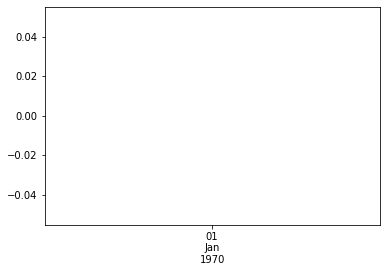

In [141]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot()

The top of this curve gives the maximum number of people that are infected at the same time.

In [ ]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

In [ ]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[:].plot()

Keep exploring! Stay home, wash your hands, keep your distance.